# In class exercises for SVM tutorial

## Read in data from eeg study
* This time I've kept in data across a 1s window from many electrodes (20) sampled at 250Hz, so now we have a [960, 20, 250] matrix that contains data from all 960 trials, 20 electrodes, and over a 1s window following stimulus onset
* Also read in a "cond_labels" vector that has 960 0's and 1's to mark trials from the two experimental conditions 

### Hints and tips...
* Pay careful attention to the dimension that you are operating over when you take the mean, etc.
* When plotting, the size of the first axis of your "x" data must match the size of the first axis of your "y" data. The ".T" method will transpose a numpy array, or swap the first and second dimensions. E.g., if my_array.shape is 200,10, then my_array.T will be of shape 10,200. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Support vector classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# load the data...
eeg = np.load('class_demo_eeg.npz')

# get the different arrays like this...
eeg['data']
eeg['sr']
eeg['tx']
eeg['cond_labels']

# shape of data
print('Shape of the big eeg data set: ', eeg['data'].shape)

# and if you want to save some typing, especially because we only have a few variables, 
# you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']
cond_labels = eeg['cond_labels']


Shape of the big eeg data set:  (960, 20, 250)


## Plot the mean response across all trials in each of the 20 electrodes
* This will produce a plot of the mean response for each electrode across time (so you want time on the x-axis and mean response on the y-axis). 
* May need to transpose the data...
* Put labels on the axes, and plot a horizontal line at the 0 mV point.

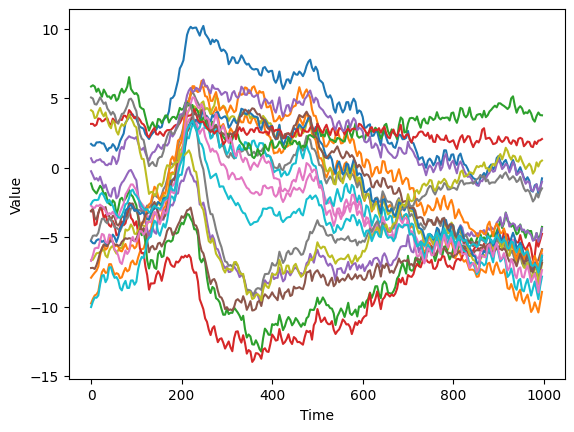

In [3]:
mean_data = np.mean(data, axis=0)
# for i in range(mean_data.shape[0]):
#     plt.plot(mean_data[i, :])

plt.plot(tx, mean_data.T)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

## That gives you an idea about what the pattern of data looks like across electrodes. 
* Importantly, not all the electrodes are doing the same thing...
* Next, take the mean across time separately in each electrode, so you should end up with a 960 x 20 matrix 
* Use the cond_labels vector to sort the data based on condition (so you have two 480 x 20 matrices), one matrix for each experimental condition.
* Take 90% (or thereabouts) of the data from each condition and use that as a training set. Use the remaining 10% of data from each condition as a test set. 
* Do classification to see if you can decode the experimental condition - train the model on your "training" data, and then test on the held out 10% from each condition.

In [4]:
new_mean_data = np.mean(data, axis=2)

c0_data = new_mean_data[np.where(cond_labels == 0)]
c1_data = new_mean_data[np.where(cond_labels == 1)]
r, c = c0_data.shape
num_train = int(np.round(r*0.9))

d0_train = c0_data[:num_train, :]
d1_train = c1_data[:num_train, :]
d_train = np.vstack((d0_train, d1_train))
y_train = np.hstack((np.zeros(num_train), np.ones(num_train)))

d0_test = c0_data[num_train:, :]
d1_test = c1_data[num_train:, :]
d_test = np.vstack((d0_test, d1_test))
y_test = np.hstack((np.zeros(r-num_train), np.ones(r-num_train)))

model = SVC(kernel="linear", C=1.0)
model.fit(d_train, y_train)
ypred_train = model.predict(d_train)
ypred_test = model.predict(d_test)

# ypred_train.shape, y_train.shape, ypred_test.shape, y_test.shape
print("Training Accuracy:", accuracy_score(ypred_train, y_train), end="; ")
print("Testing Accuracy:", accuracy_score(ypred_test, y_test))

Training Accuracy: 0.6481481481481481; Testing Accuracy: 0.5520833333333334


## Now try doing this across a more targeted set of timepoints...
* First do a time window based on where you think there is nice separation in the responses across electrodes (look at the data that you plotted above)...maybe try 300-400msec post stim and a few others...
* Bonus on your own: try timepoint x timepoint or a **moving average window** (e.g. a series of 10ms bins)

In [5]:
new_data = data[:, :, 75:100]
new_mean_data = np.mean(new_data, axis=2)

c0_data = new_mean_data[np.where(cond_labels == 0)]
c1_data = new_mean_data[np.where(cond_labels == 1)]
r, c = c0_data.shape
num_train = int(np.round(r*0.9))

d0_train = c0_data[:num_train, :]
d1_train = c1_data[:num_train, :]
d_train = np.vstack((d0_train, d1_train))
y_train = np.hstack((np.zeros(num_train), np.ones(num_train)))

d0_test = c0_data[num_train:, :]
d1_test = c1_data[num_train:, :]
d_test = np.vstack((d0_test, d1_test))
y_test = np.hstack((np.zeros(r-num_train), np.ones(r-num_train)))

model = SVC(kernel="linear", C=1.0)
model.fit(d_train, y_train)
ypred_train = model.predict(d_train)
ypred_test = model.predict(d_test)

# ypred_train.shape, y_train.shape, ypred_test.shape, y_test.shape
print("Training Accuracy:", accuracy_score(ypred_train, y_train), end="; ")
print("Testing Accuracy:", accuracy_score(ypred_test, y_test))

Training Accuracy: 0.7129629629629629; Testing Accuracy: 0.6770833333333334
